In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

# Adjust this path to match where you placed the shortcut
shared_path = '/content/drive/MyDrive/PPP'

# Confirm it's there
print(os.listdir(shared_path))

# Load your CSV
df = pd.read_csv(os.path.join(shared_path, 'bigfile.csv'))

# Preview
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['bigfile.csv']


,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,pose_Rz,X_0,X_1,X_2,X_3,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion
0,-0.1,9.4,397.4,0.013,0.027,0.062,-76.8,-77.8,-78.0,-75.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.1,8.7,397.6,0.011,0.027,0.069,-76.6,-77.5,-77.6,-75.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.2,8.4,395.7,0.021,0.030,0.072,-76.5,-77.5,-77.3,-75.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.2,8.3,395.0,0.017,0.028,0.074,-76.4,-77.4,-77.0,-75.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.1,8.4,395.9,0.019,0.028,0.074,-76.6,-77.6,-77.1,-75.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
# Filter rows where emotion is 5 or 6
filtered_df = df[df["emotion"].isin([5, 6])]

# Show just the IDs
print(filtered_df.index)


Index([ 73891,  73892,  73893,  73894,  73895,  73896,  73897,  73898,  73899,
        73900,
       ...
       299851, 299852, 299853, 299854, 299855, 299856, 299857, 299858, 299859,
       299860],
      dtype='int64', length=91563)


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# RANDOM FOREST


# === Load Data ===
data_path = "/content/drive/MyDrive/PPP/bigfile.csv"
df = pd.read_csv(data_path)

# === Features and Labels ===
X = df.drop(columns=["emotion"])
Y_raw = df["emotion"]

# === Encode Labels ===
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_raw)

# === Normalize Features (optional) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/Test Split ===
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_encoded, test_size=0.25, random_state=42, stratify=Y_encoded
)

# === Train Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, Y_train)

# === Evaluate ===
Y_pred = rf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")



Test Accuracy: 99.10%



Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      5617
           2       0.99      1.00      0.99     12375
           3       0.99      0.99      0.99     11456
           4       0.99      1.00      0.99     11971
           5       0.99      0.99      0.99     11770
           6       0.99      0.99      0.99     11121
           7       1.00      0.99      0.99      5655
           8       1.00      0.97      0.98      5001

    accuracy                           0.99     74966
   macro avg       0.99      0.99      0.99     74966
weighted avg       0.99      0.99      0.99     74966



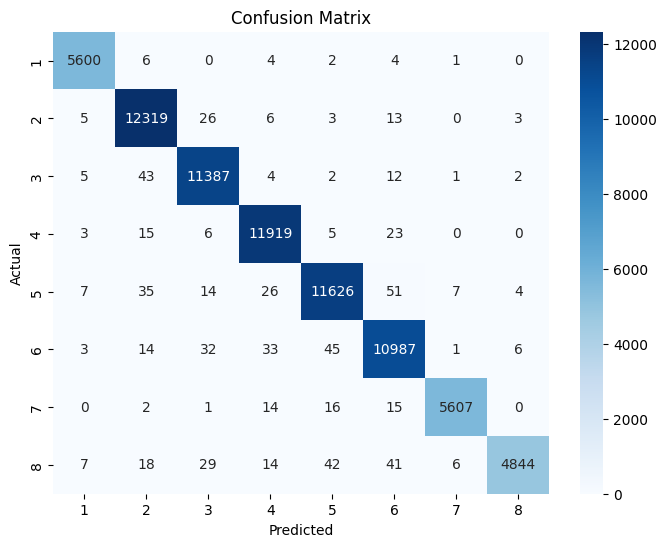

In [7]:

# === Detailed Report ===
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=[str(c) for c in label_encoder.classes_]))

# === Confusion Matrix ===
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:47:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Accuracy: 87.16%

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86      5617
           2       0.87      0.91      0.89     12375
           3       0.91      0.94      0.93     11456
           4       0.87      0.85      0.86     11971
           5       0.86      0.89      0.87     11770
           6       0.83      0.85      0.84     11121
           7       0.93      0.89      0.91      5655
           8       0.91      0.61      0.73      5001

    accuracy                           0.87     74966
   macro avg       0.88      0.86      0.86     74966
weighted avg       0.87      0.87      0.87     74966



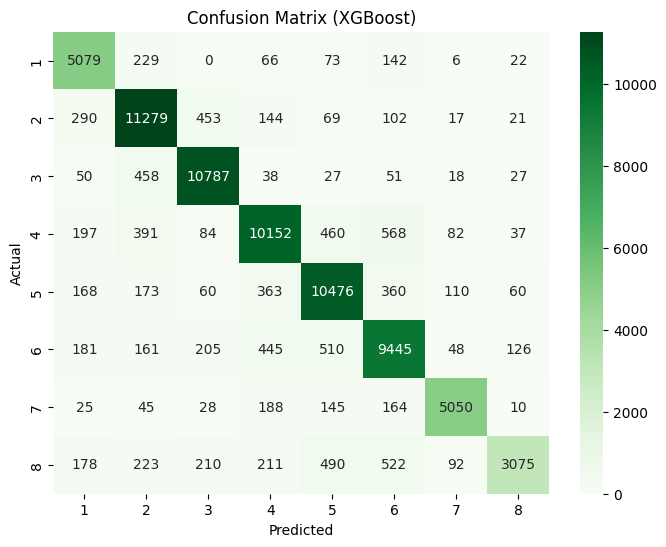

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
data_path = "/content/drive/MyDrive/PPP/bigfile.csv"
df = pd.read_csv(data_path)

# === Features and Labels ===
X = df.drop(columns=["emotion"])
Y_raw = df["emotion"]

# === Encode Labels ===
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_raw)

# === Normalize Features (optional for XGBoost) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/Test Split ===
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_encoded, test_size=0.25, random_state=42, stratify=Y_encoded
)

# === Train XGBoost ===
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, Y_train)

# === Evaluate ===
Y_pred = xgb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=[str(c) for c in label_encoder.classes_]))

# === Confusion Matrix ===
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()



--- Fold 1/5 ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:48:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1 Accuracy: 87.89%

--- Fold 2/5 ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 Accuracy: 87.21%

--- Fold 3/5 ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 Accuracy: 86.97%

--- Fold 4/5 ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4 Accuracy: 87.62%

--- Fold 5/5 ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:52:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 Accuracy: 87.29%

Average Accuracy over 5 folds: 87.40%

Classification Report (Last Fold):
              precision    recall  f1-score   support

           1       0.82      0.91      0.86      4494
           2       0.88      0.92      0.90      9899
           3       0.92      0.94      0.93      9165
           4       0.87      0.85      0.86      9577
           5       0.86      0.89      0.87      9416
           6       0.83      0.85      0.84      8896
           7       0.93      0.89      0.91      4524
           8       0.91      0.63      0.75      4001

    accuracy                           0.87     59972
   macro avg       0.88      0.86      0.86     59972
weighted avg       0.87      0.87      0.87     59972



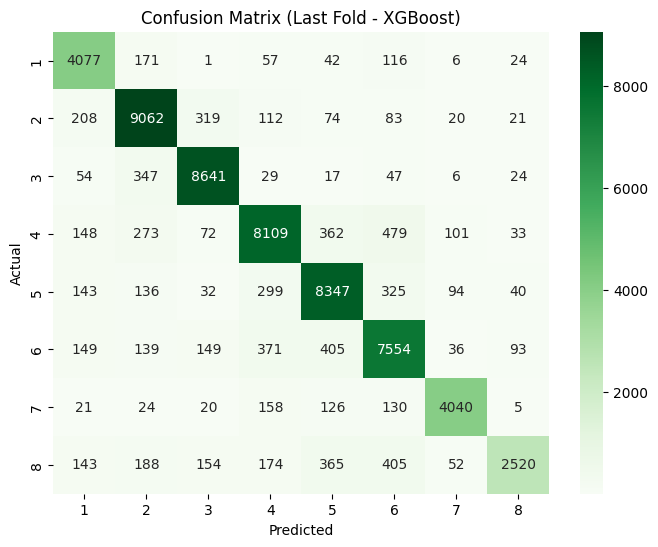

In [13]:
# XGBOOST WITH KFOLDS

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
data_path = "/content/drive/MyDrive/PPP/bigfile.csv"
df = pd.read_csv(data_path)

# === Features and Labels ===
X = df.drop(columns=["emotion"])
Y_raw = df["emotion"]

# === Encode Labels ===
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_raw)

# === Normalize Features (optional for XGBoost) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Stratified K-Fold ===
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, Y_encoded)):
    print(f"\n--- Fold {fold + 1}/{k} ---")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    Y_train, Y_test = Y_encoded[train_idx], Y_encoded[test_idx]

    # Train XGBoost
    xgb = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred = xgb.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)
    print(f"Fold {fold + 1} Accuracy: {acc * 100:.2f}%")

# === Average Accuracy ===
print(f"\nAverage Accuracy over {k} folds: {np.mean(accuracies) * 100:.2f}%")

# === Final Confusion Matrix (from last fold) ===
print("\nClassification Report (Last Fold):")
print(classification_report(Y_test, Y_pred, target_names=[str(c) for c in label_encoder.classes_]))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Last Fold - XGBoost)")
plt.show()
